In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Check the distribution of the target variable 'Class'
class_distribution = data['Class'].value_counts(normalize=True) * 100

# Print the distribution
print(class_distribution)

Class
0.0    99.740039
1.0     0.259961
Name: proportion, dtype: float64


In [ ]:
'''V17, V14, V12, V10, V16: Given their high correlation with fraud, these features might reflect suspicious activity patterns,
like unusual transaction frequencies, amounts, or merchant types.'''
'''V3, V7, V11: These could indicate patterns of spending or withdrawals,
such as the time and day of transactions or consistency in spending that deviates from the norm.'''
'''V4: With its moderate correlation, it could relate to transactional relationships,
such as similarity to previous transactions (same location, similar time, etc.).'''

import pandas as pd

# Load the dataset (replace with your file path in Colab if different)
data = pd.read_csv('/content/creditcard.csv')

# Define selected features
selected_features = [
    'V3', 'V4', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27', 'Class'
]

# Create a new DataFrame with only the selected features
filtered_data = data[selected_features]

# Save the filtered dataset as a new CSV file
filtered_data.to_csv('/content/filtered_creditcard.csv', index=False)

print("Filtered dataset saved as 'filtered_creditcard.csv'.")


Filtered dataset saved as 'filtered_creditcard.csv'.


In [ ]:
# Install SHAP if it's not already installed
!pip install shap

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load filtered dataset
filtered_data = pd.read_csv('/content/filtered_creditcard.csv')

# Split dataset into features and target
X = filtered_data.drop('Class', axis=1)
y = filtered_data['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import xgboost as xgb

# Initialize the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:21:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

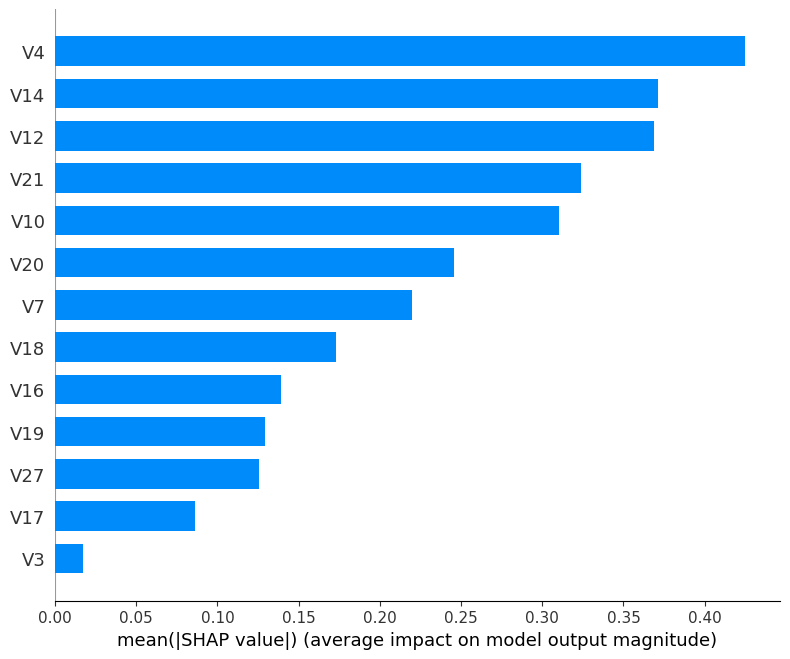

In [ ]:
import shap

# Initialize SHAP explainer with the model
explainer = shap.Explainer(model, X_train_scaled)

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Summarize feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/filtered_creditcard.csv'  # Path to your dataset
data = pd.read_csv(file_path)

# Check for missing values (drop rows with missing values if any)
print("Missing values before preprocessing:", data.isnull().sum().sum())
data = data.dropna()  # Drop rows with missing values (if there are any)

# Separate features and target variable
X = data.drop(columns=['Class'])  # Assuming 'Class' is the fraud label column
y = data['Class']

# Feature scaling (StandardScaler)
scaler = StandardScaler()

# Apply scaling to the features (excluding 'Class')
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets (before balancing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Save preprocessed data for later use
X_train.to_csv('/content/preprocessed_X_train.csv', index=False)
X_test.to_csv('/content/preprocessed_X_test.csv', index=False)
y_train.to_csv('/content/preprocessed_y_train.csv', index=False)
y_test.to_csv('/content/preprocessed_y_test.csv', index=False)

# Print shapes of the datasets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Missing values before preprocessing: 12
X_train shape: (22245, 13)
X_test shape: (9534, 13)
y_train shape: (22245,)
y_test shape: (9534,)


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')  # Update the path if needed

# Check and drop rows with NaN in the target variable 'Class'
data = data.dropna(subset=['Class'])
print(f"Number of rows after dropping NaN in 'Class': {data.shape[0]}")

# Separate features and target
X = data.drop(columns=['Class'])  # Assuming 'Class' is the target label for fraud detection
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_res_scaled = scaler.fit_transform(X_train_res)  # Scale the resampled training data
X_test_scaled = scaler.transform(X_test)  # Scale the test data

# Convert the scaled data to PyTorch tensors
X_train_torch = torch.tensor(X_train_res_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_res.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32)

# Print to confirm successful execution up to this point
print("Data preprocessing complete, ready for model training.")

# Now proceed with model training
# ---------------------------------------------------------------------------

# (Model training code can go here)


Number of rows after dropping NaN in 'Class': 75356
Data preprocessing complete, ready for model training.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
file_path = '/content/filtered_creditcard.csv'  # Path to your uploaded dataset
data = pd.read_csv(file_path)

# Check for missing values
print("Missing values:", data.isnull().sum().sum())

# Drop rows with NaN values in the 'Class' column
data = data.dropna(subset=['Class'])
print("Missing values after dropping NaNs in 'Class':", data.isnull().sum().sum())

# Separate features and target variable
X = data.drop(columns=['Class'])  # Assuming 'Class' is the column for fraud labels
y = data['Class']

# Print class distribution before balancing
print("Class distribution before balancing:", Counter(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print class distribution after balancing
print("Class distribution after SMOTE balancing:", Counter(y_train_res))

# Save the balanced data to a CSV file in the /content/ folder
balanced_data = pd.concat([X_train_res, y_train_res], axis=1)
balanced_data.to_csv('/content/balanced_creditcard.csv', index=False)  # Updated path to save in content folder

print("Balanced dataset saved as 'balanced_creditcard.csv' in the /content/ folder.")


Missing values: 12
Missing values after dropping NaNs in 'Class': 0
Class distribution before balancing: Counter({0.0: 31677, 1.0: 102})
Class distribution after SMOTE balancing: Counter({0.0: 22174, 1.0: 22174})
Balanced dataset saved as 'balanced_creditcard.csv' in the /content/ folder.


Missing values: 0
Class distribution before balancing: Counter({0.0: 22174, 1.0: 22174})
Class distribution after SMOTE balancing: Counter({1.0: 15522, 0.0: 15522})
Epoch [2/10], Loss: 0.5852
Epoch [4/10], Loss: 0.5472
Epoch [6/10], Loss: 0.5145
Epoch [8/10], Loss: 0.4866
Epoch [10/10], Loss: 0.4626


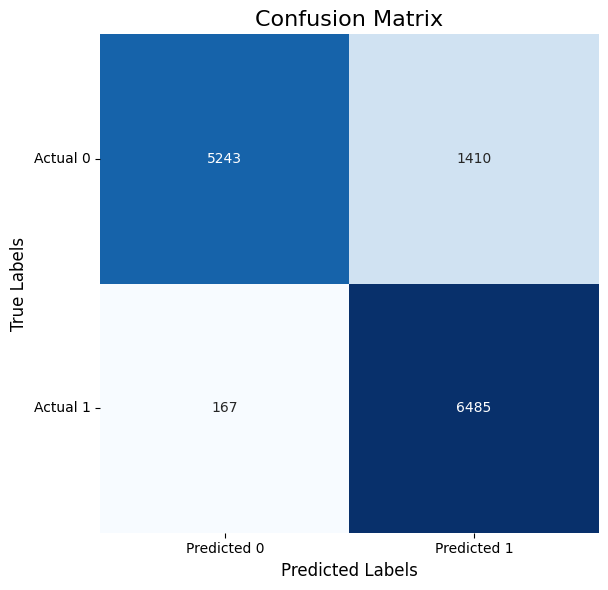

              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      6653
         1.0       0.82      0.97      0.89      6652

    accuracy                           0.88     13305
   macro avg       0.90      0.88      0.88     13305
weighted avg       0.90      0.88      0.88     13305



In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
file_path = '/content/balanced_creditcard.csv'  # Path to your uploaded dataset
data = pd.read_csv(file_path)

# Check for missing values
print("Missing values:", data.isnull().sum().sum())

# Separate features and target variable
X = data.drop(columns=['Class'])  # Assuming 'Class' is the column for fraud labels
y = data['Class']

# Print class distribution before balancing
print("Class distribution before balancing:", Counter(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print class distribution after balancing
print("Class distribution after SMOTE balancing:", Counter(y_train_res))

# Convert to PyTorch tensors and reshape for RNN
X_train_tensor = torch.FloatTensor(X_train_res.values).unsqueeze(1)  # Adding sequence length dimension
X_test_tensor = torch.FloatTensor(X_test.values).unsqueeze(1)        # Adding sequence length dimension
y_train_tensor = torch.FloatTensor(y_train_res.values).view(-1, 1)   # Reshape to match RNN output
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

# Define the Vanilla RNN Model
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass through RNN
        rnn_out, _ = self.rnn(x)  # rnn_out: (batch_size, sequence_length, hidden_size)
        out = self.fc(rnn_out[:, -1, :])  # Get the last time step output
        return torch.sigmoid(out)

# Hyperparameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 50  # Number of hidden units
output_size = 1  # Binary classification

# Instantiate the model, define the loss function and the optimizer
model = VanillaRNN(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10  # Adjust this based on your requirement
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)  # Forward pass
    loss = criterion(output, y_train_tensor)  # Calculate loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():  # Disable gradient calculation
    y_pred = model(X_test_tensor)  # Forward pass through the model

# Apply a threshold to get class labels (0 or 1)
y_pred_classes = (y_pred.numpy() > 0.5).astype(int)  # Convert to NumPy array and apply threshold

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Set up the plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)

# Add titles and labels
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8815


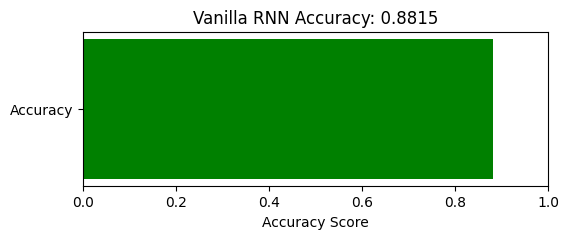

In [ ]:
# Display accuracy
accuracy = 0.8815  # Your accuracy
plt.figure(figsize=(6, 2))
plt.barh(['Accuracy'], [accuracy], color='green')
plt.xlim(0, 1)
plt.title(f'Vanilla RNN Accuracy: {accuracy:.4f}')
plt.xlabel('Accuracy Score')
plt.show()
